# Effects of Climate Change on the Polar Cryosphere

### Written by Ariana Miranda (ariana.miranda@temple.edu)

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import xarray as xr  #Import NumPy,Matplotlib, Xarray & Pandas packeages for data manipulation, advanced numerical operations and plotting data. 
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml #import momlevel for SST calc
import cftime
from cartopy import crs as ccrs, feature as cfeature #Impost cartopy to create map figures

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  #Create figures using matplotlib by defining certain size.

In [3]:
seaice_gridcell_area = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/cell_area_seaiceconc.nc')
OISST_landsea_mask = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/lsmask.nc')
OISST_SST = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/sst.oisst.mon.mean.1993_2022.nc')
seaice_observations = xr.open_zarr('/home/ees_student/Miranda_Unit5/data/seaice_concentration_data') #Import relevant data

#### The cryosphere, Earth's system of frozen ice, snow and permafrost, influences the climate of the Earth due to its albedo, or reflectivity. Incident shortwave radiation is reflected off of snow and ice because its whiteness can reflect up to 90% of solar radiation. As such, sea ice plays an important role in regulating global climate. <span style = "color:red">(1)<span> Sea ice is frozen sea water that forms during the winter season in polar waters.

#### Decadal data of sea ice extent shows annual sea ice extent is rapidly decreasing due to climate change (Figure X). Factors contributing to this include a shortening of the winter season, during which the sea ice can grow. Coupled with warmer summers, sea ice, especially in the Arctic, completely melt away and decrease the amount of multiyear ice. Multiyear sea ice are ice floes that have survived the summer season. They go on to grow thicker over time as other ice floes crash and grow into each other during consecutive winter seasons.

![640px-Pressure_ridge_(ice)_Formation_Drawing.svg.png](attachment:6f303469-d95d-458d-a9df-6cced0658dc0.png)
#### **Figure X.** Process of how multiyear ice forms. Floe 2 collides into floe 1, forming cracks and sinking loose pieces of sea ice beneath the floes. This process will create another pressure ridge where the 2 floes collided, freeze and increase the ice thickness. Image sourced from [Wikimedia Commons.](https://commons.wikimedia.org/wiki/File:Pressure_ridge_(ice)_Formation_Drawing.svg)

#### Sea ice can have an albedo of up to 90% and reflects a significant portion of incident solar radiation, preventing the Earth absorbing it and rereleasing it as longwave radiation to be absorbed by greenhouse gases. The decreasing trend of sea ice cover in the poles reduces the overall albedo of the Earth, and allows for the open ocean, which has an albedo 5-10%. The increasing open water area absorbs more longwave radiation and increases the surface temperature. Thereby, incrasing the mean global temperature further.

#### When discussing sea ice, it is important to discuss three important terms: sea ice concentration, sea ice extent and sea ice thickness. Sea ice concentration is the precentage of an area of ocean that has sea ice. Sea ice extent is the amount of ocean that is ice-covered, which is considered an area with a sea ice concentration of 15% per the Natioanl Ice and Snow Data Center (NISDC) standard. Sea ice thickness is measures the thickness of sea ice and which can be used to estimate the volume of ice and age of individual sea ice floes.

#### Multiyear sea ice is more common in the Arctic than the Antartic because of the land-to-ocean ratio and latitude distance. Since the Arctic is surrounded by land, sea ice is restricted in its ability to move around. With the ice in a limited area that remains cold, it is less affected by summer melt. It also has a higher likelihood of amalgamating into other ice floes and grow into each other when the winter returns. Over time, this allows Artctic ice to grow thicker.

#### Meanwhile, the Antarctic is surrounded by ocean. This allows for sea ice to grow unimpeded and covers are larger extent than in the Arctic, but being farther away from the South Pole, most sea ice melts away come summer. Antarctic wind and ocean currents can easily lift floes away from the continent and are less likely to amalgamate with other floes. Antarctic sea ice can only form along the flanks of the Antarctic continent, where it is much warmer. Overall, Antartic sea ice thickness is much lower than the Arctic though its winter extent is much larger. Antarctic sea ice has not shown any siginificant decreasing trend unlike the Arctic.

#### Due to the massive loss of Arctic sea ice, the North Pole is warming faster than anywhere else on the planet, a phenomenon called the Arctic amplification. The cause has been the loss of both overall sea ice extent and lessening multiyear ice, which plays an important part in relfecting longwave radiation on Earth and preventing temperatures from rising. The continued melting of Arctic ice reinforces a positive feedback loop where the decreasing sea ice cascades other processes which increase the surface temperature of the Arctic. These ffects are increasing surface temperatures releases more carbon dioxiode from rampant wildfire, melting of permafrost thereby releasing methane and disruption of jet air stream inlfuecing lower latitude cliamte. 

#### Sea ice melt does not contribute to rising sea levels because the water for the ice was sourced from the ocean. After ice melts, it will be reincorporated into the ocean. The volume change from water to ice, ice-versa, is negligible.  

In [4]:
sib = seaice_observations.icec
si_timeavg = sib.sel(time=slice("1982-01-01", "2022-12-01"))
si_timeavg.time

si_annual_avg = si_timeavg.mean(dim=['time'])

#### Sea Ice Extent Analysis

In [5]:
#Create function to convert sea ice from m2 to Mm2
SIE = seaice_observations*seaice_gridcell_area.cell_area
SIE_km2 = SIE*0.000000000001


SIE_metric = SIE_km2.icec
SIE_weighted = SIE_metric

In [6]:
SIE_weighted

<xarray.DataArray 'icec' (time: 505, lat: 720, lon: 1440)>
dask.array<mul, shape=(505, 720, 1440), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [7]:
#Get the weighted SIE avg from 1982 to 2010
SIE_1982_2010 = SIE_weighted.sel(time=slice('1982-01-01','2010-12-01'))
SIE_1982_2010_avg = SIE_1982_2010.groupby('time.month').mean(dim='time')

In [8]:
SIE_1982_2010_avg

<xarray.DataArray 'icec' (month: 12, lat: 720, lon: 1440)>
dask.array<stack, shape=(12, 720, 1440), dtype=float64, chunksize=(1, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [9]:
arc_SIE_1982_2010_avg = SIE_1982_2010_avg.sel(lat=slice(55,90))
arc_SIE_1982_2010_avg_sum = arc_SIE_1982_2010_avg.sum(dim=['lat','lon'])

In [10]:
#Get weighted SIE for 2020
SIE_2020 = SIE_weighted.sel(time=slice('2020-01-01','2020-12-01'))
SIE_2020_avg = SIE_2020.groupby('time.month').mean(dim='time')
arc_SIE_2020_avg = SIE_2020_avg.sel(lat=slice(55,90))
arc_SIE_2020_avg_sum = arc_SIE_2020_avg.sum(dim=['lat','lon'])

In [11]:
#Get weighted SIE for 2021
SIE_2021 = SIE_weighted.sel(time=slice('2021-01-01','2021-12-01'))
SIE_2021_avg = SIE_2021.groupby('time.month').mean(dim='time')
arc_SIE_2021_avg = SIE_2021_avg.sel(lat=slice(55,90))
arc_SIE_2021_avg_sum = arc_SIE_2021_avg.sum(dim=['lat','lon'])

In [12]:
#Get weighted SIE for 2021
SIE_2012 = SIE_weighted.sel(time=slice('2012-01-01','2012-12-01'))
SIE_2012_avg = SIE_2012.groupby('time.month').mean(dim='time')
arc_SIE_2012_avg = SIE_2012_avg.sel(lat=slice(55,90))
arc_SIE_2012_avg_sum = arc_SIE_2012_avg.sum(dim=['lat','lon'])

In [13]:
#Set standard deviations for 1982-2010 weighted avg
arc_SIE_1982_2010_dev = SIE_1982_2010.groupby('time.month').std(dim='time').sel(lat=slice(55,90)).sum(dim=['lat','lon'])

In [14]:
grid = ((seaice_observations.icec*seaice_gridcell_area.cell_area).sel(lat=slice(55,90)).mean(dim=['lat','lon']))/10000000
months_grid = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time')
months_grid_dev = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time') #.sum(dim=['lat','lon'])

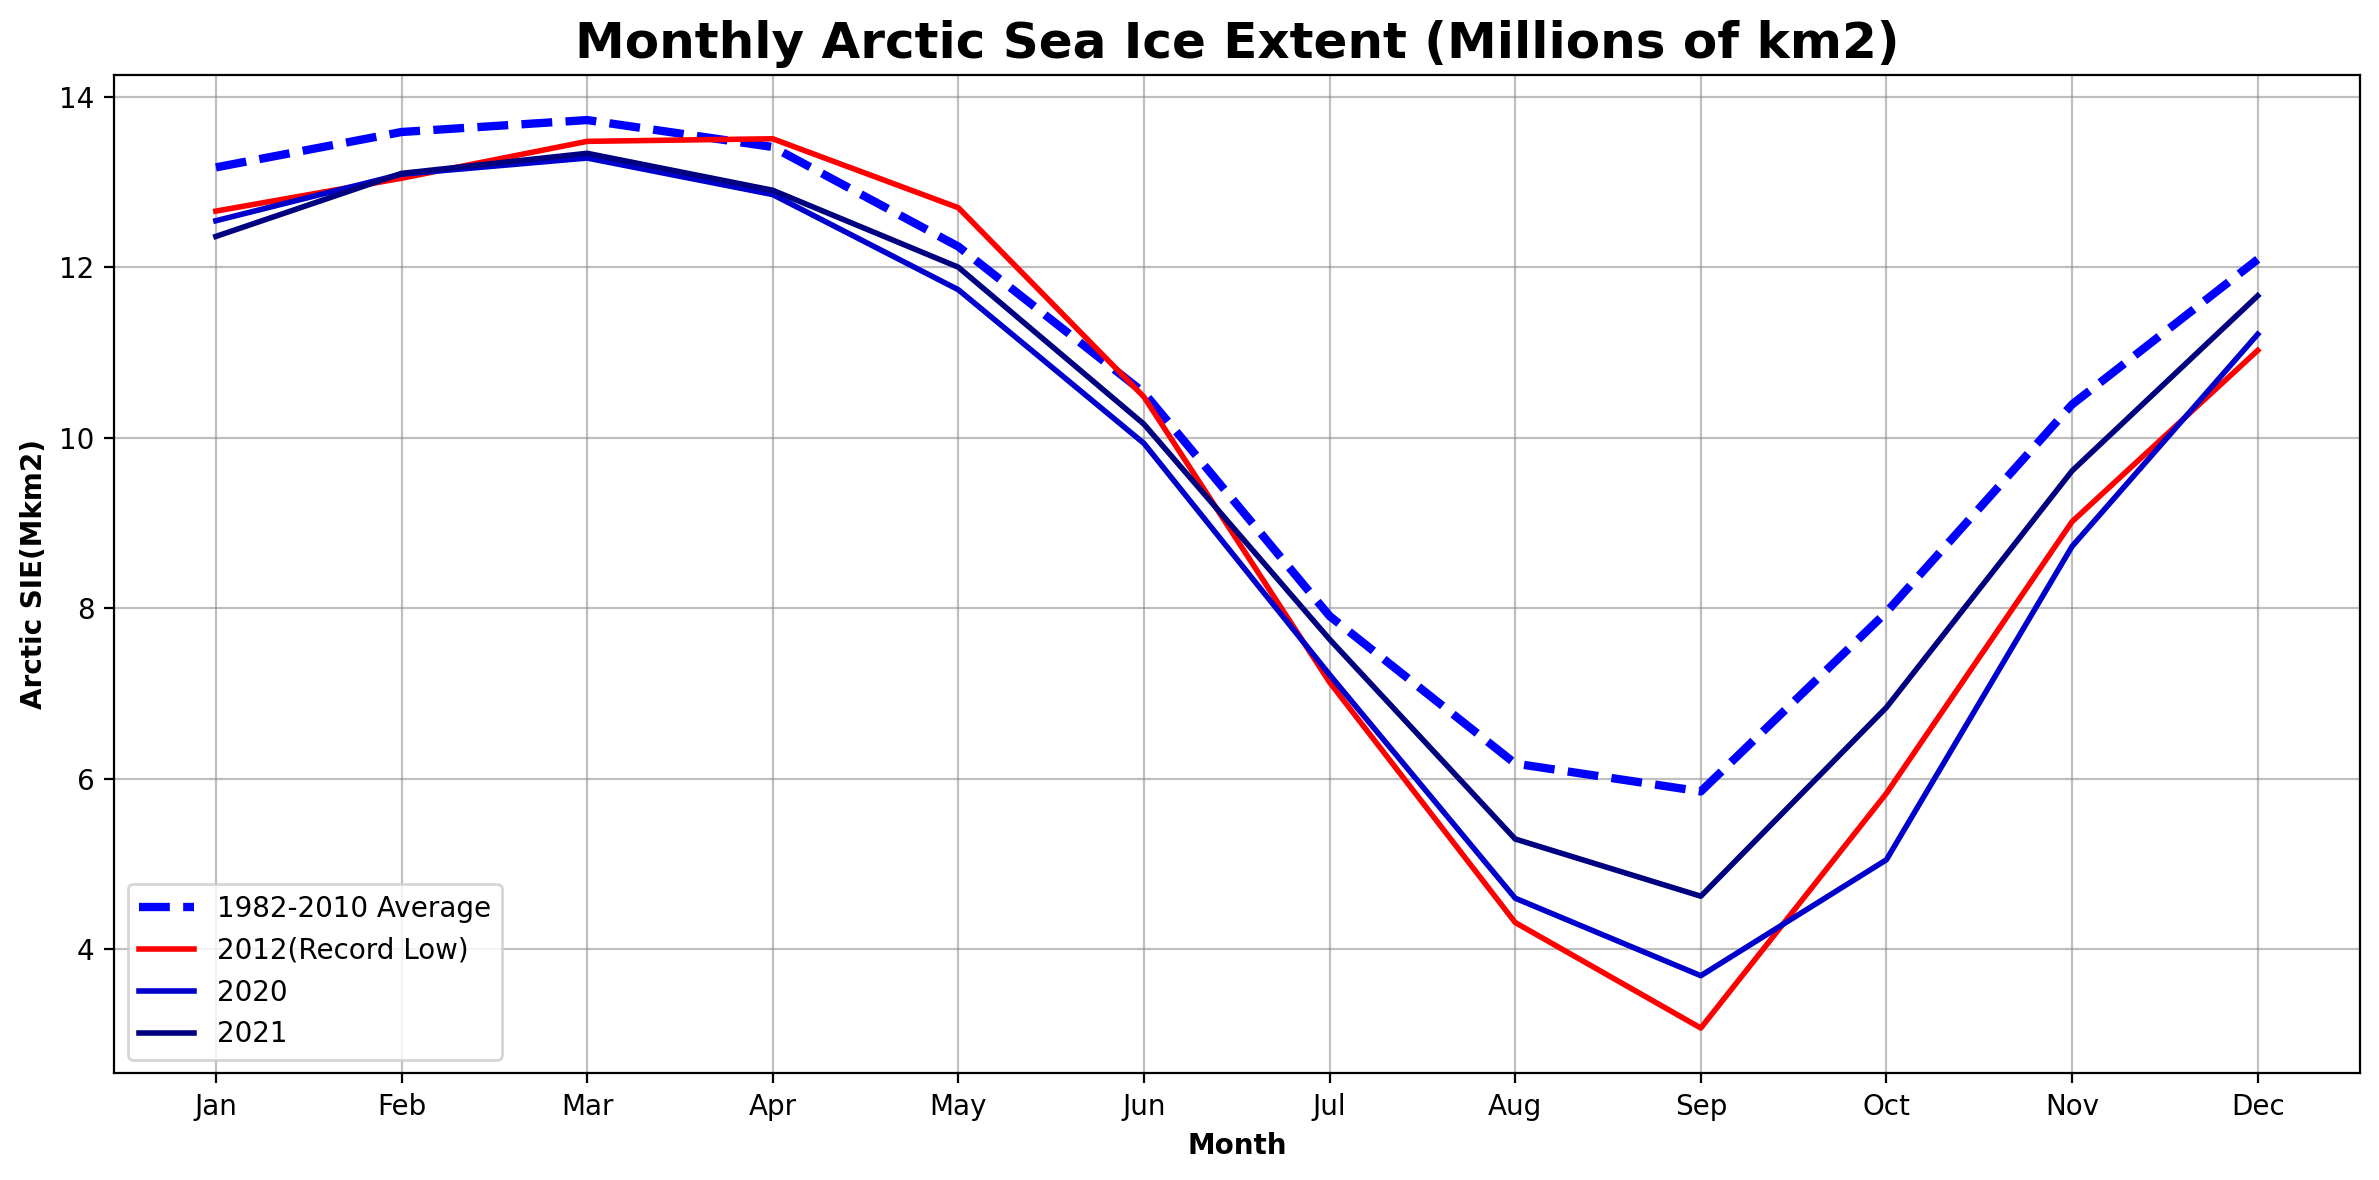

In [15]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
arc_SIE_1982_2010_avg_sum_months = arc_SIE_1982_2010_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2012_avg_sum_months = arc_SIE_2012_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2020_avg_sum_months = arc_SIE_2020_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2021_avg_sum_months = arc_SIE_2021_avg_sum.drop(labels='month').assign_coords({'month':month})

fig, ax = plt.subplots()  
arc_SIE_1982_2010_avg_sum_months.plot(lw = 3, color = 'blue', linestyle='--', label='1982-2010 Average')
arc_SIE_2012_avg_sum_months.plot(lw = 2, color = 'red', label='2012(Record Low)')
arc_SIE_2020_avg_sum_months.plot(lw = 2, color = 'mediumblue', label='2020')
arc_SIE_2021_avg_sum_months.plot(lw = 2, color = 'navy', label='2021')

ax.set_facecolor('white')
ax.set_ylabel('Arctic SIE(Mkm2)',fontsize=10, fontweight='bold')
ax.set_xlabel('Month',fontsize=10, fontweight='bold')
ax.grid(color='grey', alpha=0.5)
ax.legend()    #add legend to plot
plt.title("Monthly Arctic Sea Ice Extent (Millions of km2)", fontsize=18, fontweight='bold')
plt.tight_layout() ## make it look nicely spaced!

#### Figure X. Monthly mean SIE in the Arctic for various for various years. The blue dashed line shows the monthly mean SIE average from 1982 to 2010. In more recent times, 2021 (dark blue) and 2020 (medium blue) monthly mean SIE show a marked decrease in SIE compared to the 22 year average. 2012 (red) is the lowest year on record for Arctic SIE. Overall, Arctic SIE is decreasing from the late 20th century into the 21st.

In [16]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [17]:
si_time = seaice_observations.icec.sel(time=slice("1982-01-01", "2022-12-01"))
ant_si = si_time.sel(lat=slice(-90, -55))
ant_si_monthavg = ant_si.groupby('time.month').mean(dim='time')

In [18]:
ant_si_monthavg

<xarray.DataArray 'icec' (month: 12, lat: 140, lon: 1440)>
dask.array<stack, shape=(12, 140, 1440), dtype=float32, chunksize=(1, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... -55.62 -55.38 -55.12
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    actual_range:   [0.009999999776482582, 1.0]
    dataset:        NOAA High-resolution Blended Analysis
    level_desc:     Surface
    long_name:      Monthly Mean Sea Ice Concentration
    parent_stat:    Individual Observations
    precision:      2.0
    standard_name:  sea_ice_area_fraction
    statistic:      Monthly Mean
    units:          percent
    valid_range:    [0.0, 1.0]
    var_desc:       Sea Ice Concentration

#### **Figure X.** The averaged minimum extent of Arctic sea ice concentration during boreal summer (September).

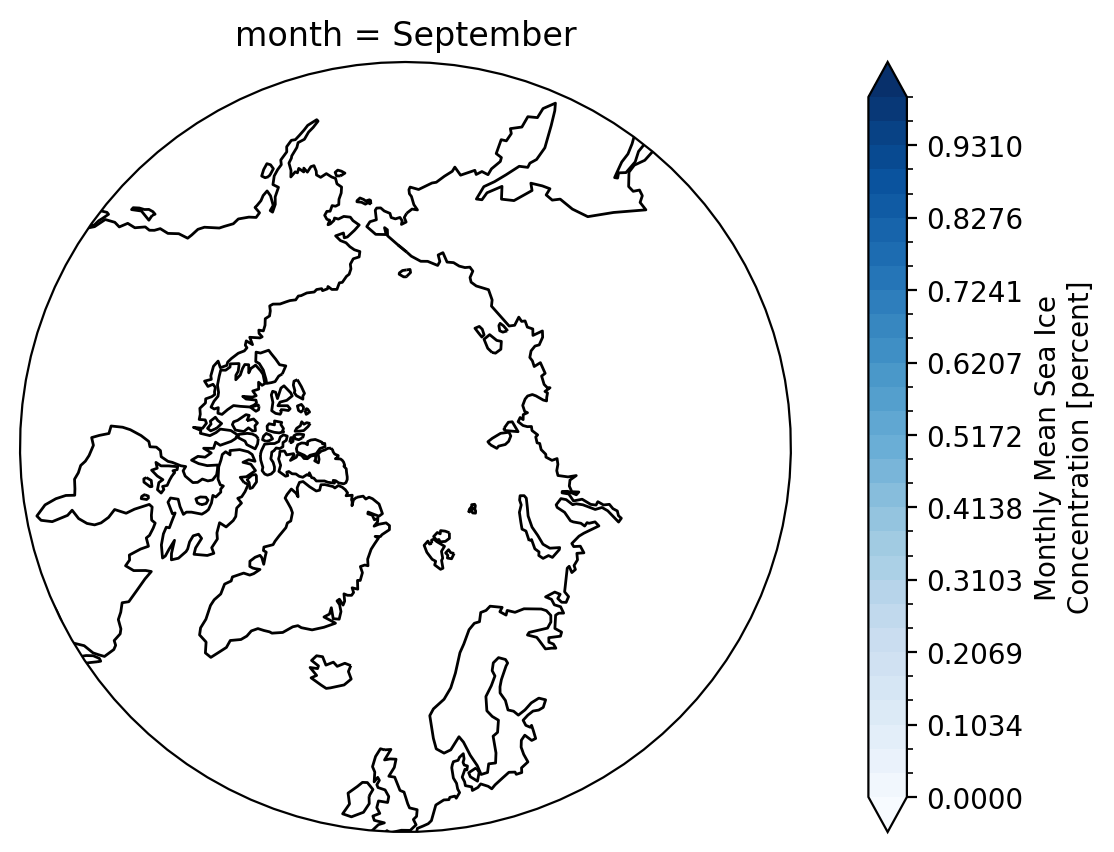

In [19]:
arc_si_sep = ant_si_monthavg.sel(month=9)
arc_si_sep['month']='September'
North_Polar(arc_si_sep,0,1,'Blues')

#### **Figure X.** The averaged maximum extent of Arctic sea ice concentration during boreal winter (March).

In [20]:
arc_si_mar = arc_si_monthavg.sel(month=3)
arc_si_mar['month']='March'
North_Polar(arc_si_mar,0,1,'Blues')

NameError: name 'arc_si_monthavg' is not defined

In [ ]:
#Get the weighted SIE avg from 1982 to 2010
ant_SIE_1982_2010_avg = SIE_1982_2010_avg.sel(lat=slice(-90,-55))
ant_SIE_1982_2010_avg_sum = ant_SIE_1982_2010_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2012
ant_SIE_2012 = SIE_weighted.sel(time=slice('2012-01-01','2012-12-01')) #Create new variable defining 2012 for weighted SIE
ant_SIE_2012_avg = SIE_2012.groupby('time.month').mean(dim='time')

ant_SIE_2012_avg = SIE_2012_avg.sel(lat=slice(-90,-55))
ant_SIE_2012_avg_sum = ant_SIE_2012_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2020
ant_SIE_2020 = SIE_weighted.sel(time=slice('2020-01-01','2020-12-01')) #Create new variable defining 2020 for weighted SIE
ant_SIE_2020_avg = SIE_2020.groupby('time.month').mean(dim='time')

ant_SIE_2020_avg = SIE_2020_avg.sel(lat=slice(-90,-55))
ant_SIE_2020_avg_sum = ant_SIE_2020_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2021
ant_SIE_2021 = SIE_weighted.sel(time=slice('2021-01-01','2021-12-01')) #Create new variable defining 2021 for weighted SIE
ant_SIE_2021_avg = SIE_2021.groupby('time.month').mean(dim='time')

ant_SIE_2021_avg = SIE_2021_avg.sel(lat=slice(-90,-55))
ant_SIE_2021_avg_sum = ant_SIE_2021_avg.sum(dim=['lat','lon'])

In [ ]:
ant_grid = ((seaice_observations.icec*seaice_gridcell_area.cell_area).sel(lat=slice(-90,-55)).mean(dim=['lat','lon']))/10000000
ant_months_grid = ant_grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time')
ant_months_grid_dev = ant_grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time') #.sum(dim=['lat','lon'])

ant_upper_bound = ant_months_grid + ant_months_grid_dev + ant_months_grid_dev
ant_lower_bound = ant_months_grid - ant_months_grid_dev - ant_months_grid_dev

In [ ]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ant_SIE_1982_2010_avg_sum_months = ant_SIE_1982_2010_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2012_avg_sum_months = ant_SIE_2012_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2020_avg_sum_months = ant_SIE_2020_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2021_avg_sum_months = ant_SIE_2021_avg_sum.drop(labels='month').assign_coords({'month':month})

fig, ax = plt.subplots()  
ant_SIE_1982_2010_avg_sum_months.plot(lw = 2, color = 'blue', linestyle='--', label='1982-2010 Average')
ant_SIE_2012_avg_sum_months.plot(lw = 3, color = 'red', label='2012(record low)')
ant_SIE_2020_avg_sum_months.plot(lw = 3, color = 'mediumblue', label='2020')
ant_SIE_2021_avg_sum_months.plot(lw = 3, color = 'navy', label='2021')

ax.set_facecolor("white")
ax.set_ylabel('Antarctic SIE(Mkm2)',fontsize=10, fontweight='bold')
ax.set_xlabel('Month',fontsize=10, fontweight='bold')
ax.grid(color='grey', alpha=0.5)
ax.legend()    #add legend to plot
plt.title("Antarctic Daily Sea Ice Extent(Millions of km2)",fontsize=18, fontweight='bold')
plt.tight_layout() #Space it out nicely

#### Figure X. Monthly mean SIE in the Antrctic for various for various years. The blue dashed line shows the monthly mean SIE average from 1982 to 2010 with standard deviations (gray). In more recent times, 2021 (dark blue) and 2020 (medium blue) monthly mean SIE show a marked decrease in SIE compared to the 22 year average. 2012 (red) is the lowest year on record for Arctic SIE. Overall, Arctic SIE is decreasing from the late 20th century into the 21st.

In [ ]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [ ]:
si_time = seaice_observations.icec.sel(time=slice("1982-01-01", "2022-12-01"))
ant_si = si_time.sel(lat=slice(-90, -55))
ant_si_monthavg = ant_si.groupby('time.month').mean(dim='time')

#### **Figure X.** The averaged maximum extent of Antarctic sea ice concentration during austral winter (August).

In [ ]:
ant_si_aug = ant_si_monthavg.sel(month=8)
ant_si_aug['month']='August'
South_Polar(ant_si_aug,0,1,'Blues')

#### **Figure X.** The averaged minimum extent of Antarctic sea ice concentration during austral summer (Feburary).

In [ ]:
ant_si_feb = ant_si_monthavg.sel(month=2)
ant_si_feb['month']='February'
South_Polar(ant_si_feb,0,1,'Blues')

## Sea Surface Temperature (SST) Observation Analysis

In [ ]:
lat_sst = SST_OISST.coords['lat'].values # Defining 1-D numpy array of model's latitude values from SST_OISST variable
lon_sst = SST_OISST.coords['lon'].values # Defining 1-D numpy array of model's longitude values from SST_OISST variable

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_sst,lon_sst)  
areacell_xarray = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),  
                                                coords=(SST_OISST.coords['lat'],\
                                                        SST_OISST.coords['lon']))

weights = areacell_xarray*OISST_landsea_mask.mask #Defining a new variable via the function to omit SST data from 
                                                  #land areas. Done by multiplying areaceell_xarray by land_sea_mask
weighted_average_SST = SST.weighted(weights).mean(['lat', 'lon']) 
#Create new variable of weighted SST using calculated weights from above and averaging both variables across the
#globe using lat & lon
weighted_average_SST.plot()

## GFDL-ESM4 Model Analysis

#### The following analyses uses output data from the Earth System Model (GFDL-ESM4) developed by Geophysical Fluid Dynamics Laboratory. The model uses a high emissions scenario (RCP8.5) as defined by the International Panel on Climate Change (IPCC) and calculates the daily sea ice extent (SIE) and sea surface temperature (SST). The first section reviews analyses of SIE model data. The second reviews SST model data.

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
gfdl_esm4_sea_ice_data = df.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'SImon' & \
    variable_id == 'siconc' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p1f1'"
)

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore_siconc = gfdl_esm4_sea_ice_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_siconc = gcs.get_mapper(zstore_siconc)
# open the dataset using xarray and zarr
gfdl_esm4_historical_siconc = xr.open_zarr(mapper_siconc, 
                                         consolidated=True,use_cftime=True
                                         ).siconc.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

In [ ]:
gfdl_esm4_cell_area_data = df.query(
    "activity_id=='CMIP' & \
    table_id == 'Ofx' & \
    variable_id == 'areacello' & \
    experiment_id == 'piControl' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_area = gfdl_esm4_cell_area_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_area = gcs.get_mapper(zstore_area)
# open the dataset using xarray and zarr
gfdl_esm4_cell_area = xr.open_zarr(mapper_area, 
                                         consolidated=True,
                                         ).areacello.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

In [ ]:
gfdl_esm4_cell_area_arc=gfdl_esm4_cell_area.sel(latitude=slice(0,89.89)) #Slice out cell area in Arctic 
gfdl_esm4_cell_area_ant=gfdl_esm4_cell_area.sel(latitude=slice(-77.91,0)) #Slice out cell area in Antarctic 

In [ ]:
gfdl_esm4_historical_siconc_arc=gfdl_esm4_historical_siconc.sel(latitude=slice(0,89.89)) #Slice out sea ice (si) in Arctic 
gfdl_esm4_historical_siconc_ant=gfdl_esm4_historical_siconc.sel(latitude=slice(-77.91,0)) #Slice out si in Antarctic 
sie_arc= gfdl_esm4_historical_siconc_arc*gfdl_esm4_cell_area_arc #Calculating the sea ice extent (SIE) for arctic 
sie_ant=gfdl_esm4_historical_siconc_ant*gfdl_esm4_cell_area_ant #Calculating SIE in the Antarctic
sie_annual_arc = (ml.util.annual_average(sie_arc,tcoord='time'))*0.000001#Calculate annual average using momlevel for Arc and Ant
sie_annual_ant = (ml.util.annual_average(sie_ant,tcoord='time'))*0.000001

In [ ]:
#Slice variables to make array of Antarctic mean SIE for 2014-2025 data
ant_2014_2025 = sie_annual_ant.sel(time=slice('2014-07-02','2025-07-02'))
ant_2014_2025_avg = ant_2014_2025.mean('time')
ant_sie_f10 = ant_2014_2025_avg.sum(dim = ['latitude','longitude'])

#Slice variables to make array of Arctic mean SIE for 2014-2025 data
arc_2014_2025 = sie_annual_arc.sel(time=slice('2014-07-02','2025-07-02'))
arc_2014_2025_avg = arc_2014_2025.mean('time')
arc_sie_f10 = arc_2014_2025_avg.sum(dim = ['latitude','longitude'])

In [ ]:
#Slice variables to make array of Antarctic mean SIE for 2081-2100 data
ant_2081_2100 = sie_annual_ant.sel(time=slice('2081-07-02','2100-07-02'))
ant_2081_2100_avg = ant_2081_2100.mean('time')
ant_sie_l20 = ant_2081_2100_avg.sum(dim = ['latitude','longitude'])

#Slice variables to make array of Arctic mean SIE for 2081-2100 data
arc_2081_2100 = sie_annual_ant.sel(time=slice('2081-07-02','2100-07-02'))
arc_2081_2100_avg = arc_2081_2100.mean('time')
arc_sie_l20 = arc_2081_2100_avg.sum(dim = ['latitude','longitude'])

In [ ]:
#Calculate the difference in the first 10 years of the 21 century from the last 20 from model data
ant_change = ant_2081_2100_avg - ant_2014_2025_avg
arc_change = arc_2081_2100_avg - arc_2014_2025_avg

In [ ]:
ant_change

In [ ]:
arc_change

In [ ]:
#Convert SIE from m2 to km2 
ant_sie_f10_km=ant_sie_f10*0.000001
arc_sie_f10_km=arc_sie_f10*0.000001
ant_sie_120_km=ant_sie_l20*0.000001
ant_sie_l20_km=arc_sie_l20*0.000001

In [ ]:
ant_sie_f10_km.values

In [ ]:
ant_sie_f10_km.values

In [ ]:
ant_sie_120_km.values

In [ ]:
ant_sie_l20_km.values

In [ ]:
subplot_kws1=dict(projection=ccrs.NorthPolarStereo(central_longitude=200.0),
                 facecolor='white')
subplot_kws2=dict(projection=ccrs.SouthPolarStereo(central_longitude=-120.0),
                 facecolor='white')

### Set up our figure settings
f1= fig, ((ax1, ax2, ax3)) = plt.subplots(ncols=3,
                       nrows=1,
                       figsize=(20,20), subplot_kw=subplot_kws1) ## set up our plotting area

### Plot our data
p1 = ant_2014_2025_avg.plot(x='geolon', y='geolat', ax=ax1, col_wrap=2,
                  cmap='Blues', 
                  vmin=0,vmax=40000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)
ax1.coastlines()
ax1.set_title('2014-2025', fontsize=14, fontweight='bold')

p2 = ant_2081_2100_avg.plot(x='geolon', y='geolat', ax=ax2, col_wrap=2,
                  cmap='Blues', 
                  vmin=0,vmax=30000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax2.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.coastlines()
ax2.set_title('2081-2100', fontsize=14, fontweight='bold')

p3 = arc_change.plot(x='geolon', y='geolat', ax=ax3, col_wrap=2,
                  cmap='Reds', 
                  vmin=-10000000000,vmax=40000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Change in Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax3.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.coastlines()
ax3.set_title('Change in arctic SIE at the end of the century compared to the beginning', fontsize=14, fontweight='bold')

f2= fig, ((ax4, ax5, ax6)) = plt.subplots(ncols=3,
                       nrows=1,
                       figsize=(20,20), subplot_kw=subplot_kws2) ## set up our plotting area

p4 = arc_2014_2025_avg.plot(x='geolon', y='geolat', ax=ax4, col_wrap=2,
                  cmap='Blues', 
                  vmin=0,vmax=25000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax4.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.coastlines()
ax4.set_title('2014-2025', fontsize=14, fontweight='bold')

p5 = ant_2014_2025_avg.plot(x='geolon', y='geolat', ax=ax5, col_wrap=2,
                  cmap='Blues', 
                  vmin=0,vmax=25000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax5.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax5.set_boundary(circle, transform=ax5.transAxes)
ax5.coastlines()
ax5.set_title('2081-2100', fontsize=14, fontweight='bold')

p6 = ant_change.plot(x='geolon', y='geolat', ax=ax6, col_wrap=2,
                  cmap='Reds', 
                  vmin=-10000000000,vmax=40000000000, extend='both',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={"orientation": "horizontal", "shrink": 0.5, "aspect": 20, "label": "Change in Sea Ice Extent (m2)", "pad": 0.02}, 
                  robust=True)
# Limit the map to -50 degrees latitude and below.
ax6.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax6.set_boundary(circle, transform=ax6.transAxes)
ax6.coastlines()
ax6.set_title('Change in antarctic SIE at the end of the century compared to the beginning', fontsize=14, fontweight='bold')

In [21]:
#Create new arrays for Arctic and Antarctic annual SIE over 21st century
sie = gfdl_esm4_historical_siconc*gfdl_esm4_cell_area
sie_arc = sie.sel(latitude=slice(0,90))
sie_arc_total = sie_arc.sum(dim=['latitude','longitude'])
annual_sie_arc_total = ml.util.annual_average(sie_arc_total,tcoord='time')

sie = gfdl_esm4_historical_siconc*gfdl_esm4_cell_area
sie_ant = sie.sel(latitude=slice(-90,0))
sie_ant_total = sie_ant.sum(dim=['latitude','longitude'])
annual_sie_ant_total = ml.util.annual_average(sie_ant_total,tcoord='time')

fig, ax0 = plt.subplots()                        
annual_sie_arc_total.convert_calendar('Gregorian').plot(ax=ax0,    #DataArray.plot(ax=axis_to_plot_on)
                            color='blue',    #color of the line
                            label='Arctic Mean Annual SIE')    #legend label  

                      
annual_sie_ant_total.convert_calendar('Gregorian').plot(ax=ax0,    #DataArray.plot(ax=axis_to_plot_on)
                            color='dodgerblue',    #color of the line
                            label='Antarctic Mean Annual SIE')    #legend label      

ax0.set_ylabel('Mean Sea Ice Extent(in m2)',fontsize=10, fontweight='bold')
ax0.set_xlabel('Year',fontsize=10,fontweight='bold')
ax0.legend()    #add legend to plot
plt.title("Annual Mean Sea Ice Extent from 2014-2100", fontsize=18, fontweight='bold')
plt.tight_layout() ## make it look nicely spaced!

NameError: name 'gfdl_esm4_historical_siconc' is not defined

#### **Figure X.** Change in annual mean sea ice extent calculated from the GFDL-ESM4 dataset. Both Antarctic and Arctic SIE has an overall decreasing trend. The Arctic (blue) is more pronounced due to the Arctic amplification effect. In the Antarctic (light blue), the SIE remains somewhat stable until the 2050s, then drops at approximately the same rate as Arctic SIE.

#### Changes in SST Analysis

In [22]:
gfdl_esm4_sst_data = df.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'tos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p1f1'"
)

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore_sst = gfdl_esm4_sst_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_sst = gcs.get_mapper(zstore_sst)
# open the dataset using xarray and zarr
gfdl_esm4_historical_sst = xr.open_zarr(mapper_sst, 
                                         consolidated=True,use_cftime=True
                                         ).tos.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

NameError: name 'df' is not defined

In [ ]:
#Create variable of global area weighted annual SST
global_SST = gfdl_esm4_historical_sst 
global_SST_annual = ml.util.annual_average(global_SST, tcoord='time')

global_area = gfdl_esm4_cell_area
global_warea_SST = global_SST_annual.weighted(global_area).mean(['latitude', 'longitude'])

#Create variable of Arctic area weighted annual SST
arc_SST = global_SST.sel(latitude=slice(55,90))
arc_SST_annual = ml.util.annual_average(arc_SST, tcoord='time')

arc_area = global_area.sel(latitude=slice(55, 90))
arc_warea_SST = arc_SST_annual.weighted(arc_area).mean(['latitude', 'longitude'])

#Create variable of Antarctic area weighted annual SST
ant_SST = global_SST.sel(latitude=slice(-90, -55))
ant_SST_annual = ml.util.annual_average(ant_SST, tcoord='time')

ant_area = global_area.sel(latitude=slice(-90, -55))
ant_warea_SST = ant_SST_annual.weighted(ant_area).mean(['latitude', 'longitude'])

In [ ]:
fig, (ax) = plt.subplots(figsize=(8,5)) ## set up our plotting area
global_SST.plot(linewidth=1.5, label='Global', color='red')
ax.set_ylabel('Sea Surface Temperature (Celsius)',fontsize=10, fontweight='bold')
ax.set_xlabel('Year',fontsize=10, fontweight='bold')
ax.legend()
fig.suptitle('Annual changes in SST', fontsize=16, fontweight='bold')
plt.tight_layout() #Make figure look nice

In [ ]:
fig, (ax) = plt.subplots(figsize=(9,5)) ## set up our plotting area
arc_warea_SST.plot(linewidth=1, label='Arctic',color='blue')
ant_warea_SST.plot(linewidth=1, label='Antarctic',color='dodgerblue')
ax.set_ylabel('Sea Surface Temperature (Celsius)',fontsize=10, fontweight='bold')
ax.set_xlabel('Year',fontsize=10, fontweight='bold')
fig.suptitle('Annual Sea Surface Temperature Thorughout 21st Century', fontsize=16, fontweight='bold')
ax.legend()

#### **Figure X.** Change in annual mean SST in Celsius calculated from the GFDL-ESM4 dataset. Both Antarctic and Arctic SST has an overall increasing trend. The Arctic (blue) is incrfeasing faster pronounced due to the Arctic amplification effect. In the Antarctic (light blue), the SST remains somewhat stable until the 2050s, then increases from then to the end of the 21st century.

In [ ]:
global_2015=global_SST.sel(time=slice('2015-01-01','2015-12-31'))
global_2015_avg=ml.util.annual_average(global_2015, tcoord='time')
global_warea_SST_2015 = global_2015_avg.weighted(global_area).mean(['latitude', 'longitude'])

global_roc=((global_warea_SST_2015-global_warea_SST)/global_warea_SST_2015)*100
                           
fig, (ax) = plt.subplots(figsize=(5,5)) ## set up our plotting area
global_roc.plot()
ax.set_ylabel('Rate of Change',fontsize=14, fontweight='bold')
ax.set_xlabel('Time',fontsize=14, fontweight='bold')
ax.legend()         

In [ ]:
global_roc

In [ ]:
arc_2015=arc_SST.sel(time=slice('2015-01-01','2015-12-31'))
arc_2015_avg=ml.util.annual_average(arc_2015, tcoord='time')
arc_warea_SST_2015 = arc_2015_avg.weighted(arc_area).mean(['latitude', 'longitude'])

arc_roc=((arc_warea_SST_2015-arc_warea_SST)/arc_warea_SST_2015)*100    

In [ ]:
ant_2015=ant_SST.sel(time=slice('2015-01-01','2015-12-31'))
ant_2015_avg=ml.util.annual_average(ant_2015, tcoord='time')
ant_warea_SST_2015 = ant_2015_avg.weighted(ant_area).mean(['latitude', 'longitude'])

ant_roc=((ant_warea_SST_2015-ant_warea_SST)/ant_warea_SST_2015)*100

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,5)) ## set up our plotting area

global_roc.plot(ax=ax1,linewidth=1.5, label='Global', color='red')
ax1.set_ylabel('Rate of Change',fontsize=14, fontweight='bold')
ax1.set_xlabel('Year',fontsize=14, fontweight='bold')
ax1.legend()

arc_roc.plot(ax=ax2,linewidth=1, label='Arctic',color='blue')
ax2.set_ylabel('Rate of Change',fontsize=14, fontweight='bold')
ax2.set_xlabel('Year',fontsize=14, fontweight='bold')
ax2.legend()

ant_roc.plot(ax=ax3,linewidth=1, label='Antarctic',color='dodgerblue')
ax3.set_ylabel('Rate of Change',fontsize=14, fontweight='bold')
ax3.set_xlabel('Year',fontsize=14, fontweight='bold')
ax3.legend()

fig.suptitle('Sea Surface Temperature Rate of Change', fontsize=16, fontweight='bold')
plt.tight_layout() ## make it look nicely spaced!
fig.patch.set_facecolor('lightgrey')